In [58]:
!pip install seaborn

In [59]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [3]:
file_path = 'train'

In [60]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [61]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [6]:
filepaths

['train\\benign\\100.jpg',
 'train\\benign\\1000.jpg',
 'train\\benign\\1001.jpg',
 'train\\benign\\1002.jpg',
 'train\\benign\\1004.jpg',
 'train\\benign\\1005.jpg',
 'train\\benign\\1007.jpg',
 'train\\benign\\1008.jpg',
 'train\\benign\\1009.jpg',
 'train\\benign\\101.jpg',
 'train\\benign\\1010.jpg',
 'train\\benign\\1011.jpg',
 'train\\benign\\1012.jpg',
 'train\\benign\\1014.jpg',
 'train\\benign\\1015.jpg',
 'train\\benign\\1016.jpg',
 'train\\benign\\1017.jpg',
 'train\\benign\\102.jpg',
 'train\\benign\\1020.jpg',
 'train\\benign\\1021.jpg',
 'train\\benign\\1022.jpg',
 'train\\benign\\1024.jpg',
 'train\\benign\\1026.jpg',
 'train\\benign\\1027.jpg',
 'train\\benign\\1028.jpg',
 'train\\benign\\103.jpg',
 'train\\benign\\1030.jpg',
 'train\\benign\\1031.jpg',
 'train\\benign\\1032.jpg',
 'train\\benign\\1035.jpg',
 'train\\benign\\1036.jpg',
 'train\\benign\\1037.jpg',
 'train\\benign\\1038.jpg',
 'train\\benign\\1039.jpg',
 'train\\benign\\104.jpg',
 'train\\benign\\1040.jpg

In [62]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [63]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,train\malignant\958.jpg,malignant
1,train\malignant\417.jpg,malignant
2,train\benign\218.jpg,benign
3,train\benign\821.jpg,benign
4,train\benign\1793.jpg,benign


(array([0, 1]), [Text(0, 0, 'benign'), Text(1, 0, 'malignant')])

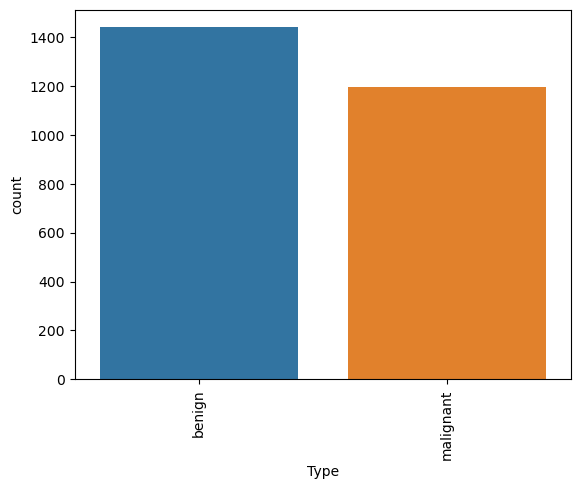

In [64]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [65]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

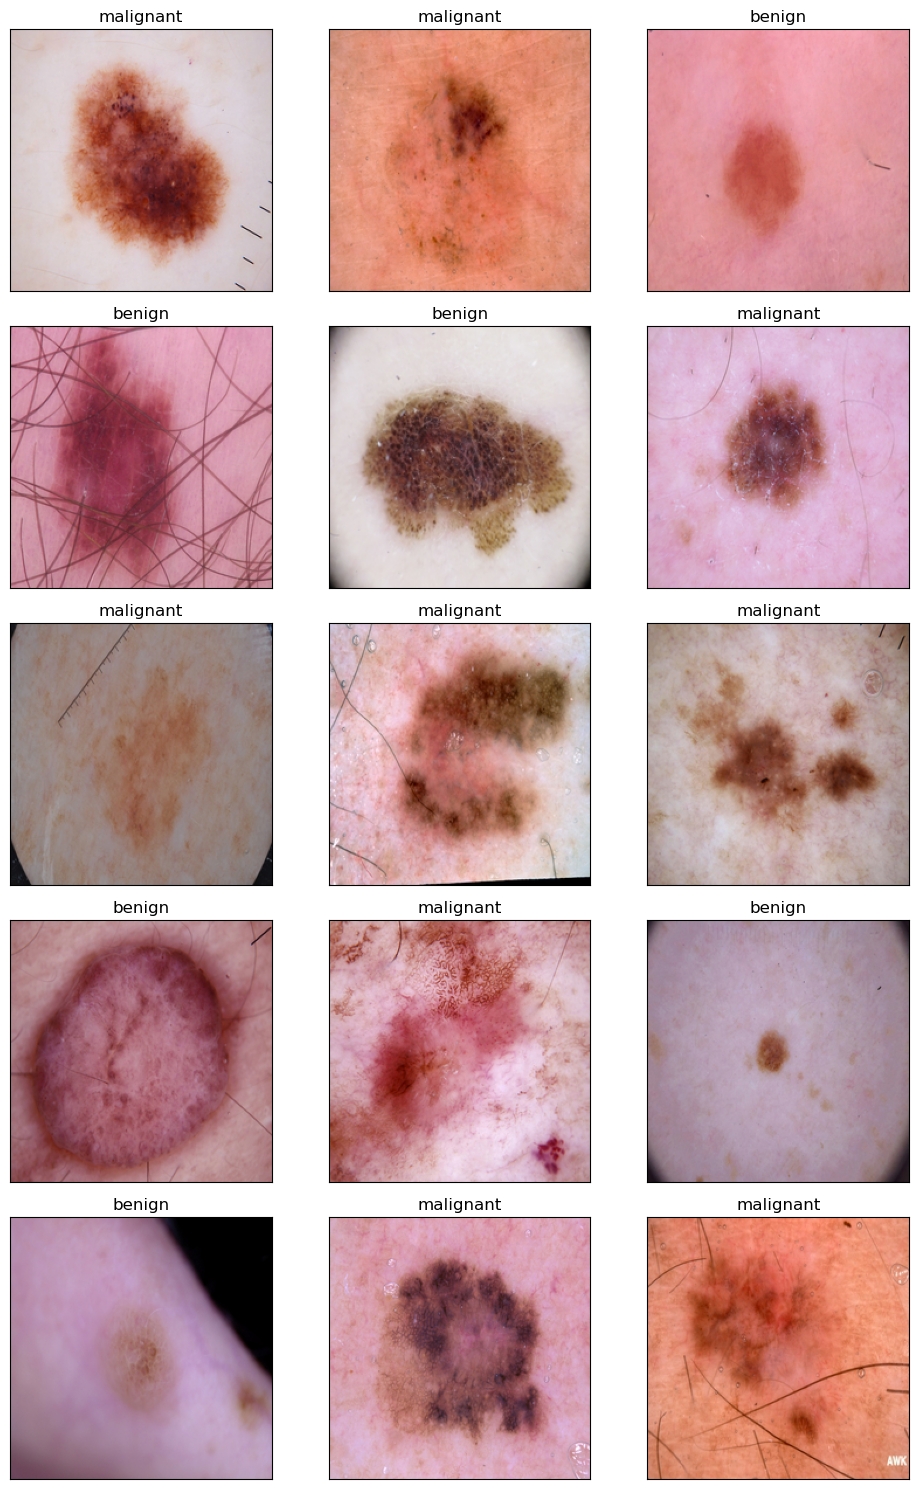

In [66]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=[10, 15], subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

plt.tight_layout()
plt.show()


In [67]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [84]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=False,
    seed=42
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='binary',
    batch_size=32,
    shuffle=False
)


Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [85]:
pretrained_model = ResNet50(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

In [86]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

In [87]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [88]:
#my_callbacks = [EarlyStopping(monitor='val_accuracy',
                             #min_delta=0,
                             #patience=2,
                             #mode='auto')]

In [90]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50,
    #callbacks=my_callbacks
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 361s 6s/step - accuracy: 0.9707 - loss: 0.0644 - val_accuracy: 0.8712 - val_loss: 0.4360
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 353s 6s/step - accuracy: 0.9762 - loss: 0.0632 - val_accuracy: 0.8818 - val_loss: 0.4068
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 350s 6s/step - accuracy: 0.9898 - loss: 0.0396 - val_accuracy: 0.8864 - val_loss: 0.4264
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 353s 6s/step - accuracy: 0.9897 - loss: 0.0283 - val_accuracy: 0.8864 - val_loss: 0.4339
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 355s 6s/step - accuracy: 0.9978 - loss: 0.0128 - val_accuracy: 0.9030 - val_loss: 0.4532
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 355s 6s/step - accuracy: 0.9980 - loss: 0.0115 - val_accuracy: 0.8712 - val_loss: 0.6828
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 409s 7s/step - accuracy: 0.9772 - loss: 0.0609 - val_accuracy: 0.8773 - val_loss: 0.4488
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 356s 6s/step - accuracy: 0.9906 - loss: 0.0267 - val_accuracy: 0.8758 - v

In [91]:
model.save("skin_model.h5")

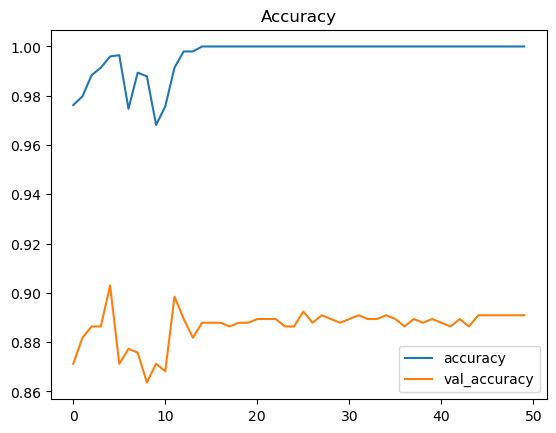

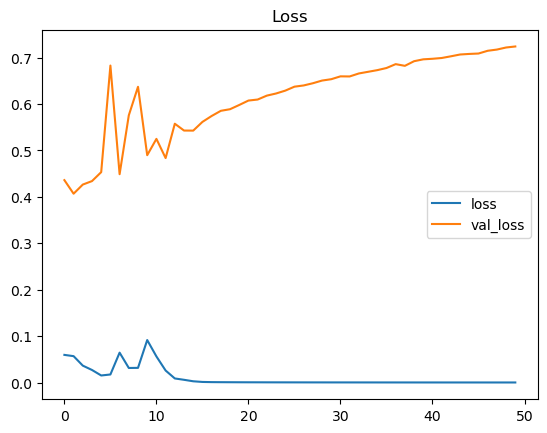

In [92]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [93]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

C:\Users\Nibedita Shee\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test Loss: 0.72391
Test Accuracy: 89.09%


In [94]:
#predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

#map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step


In [95]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.55      1.00      0.71       365
   malignant       0.00      0.00      0.00       295

    accuracy                           0.55       660
   macro avg       0.28      0.50      0.36       660
weighted avg       0.31      0.55      0.39       660



C:\Users\Nibedita Shee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nibedita Shee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nibedita Shee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


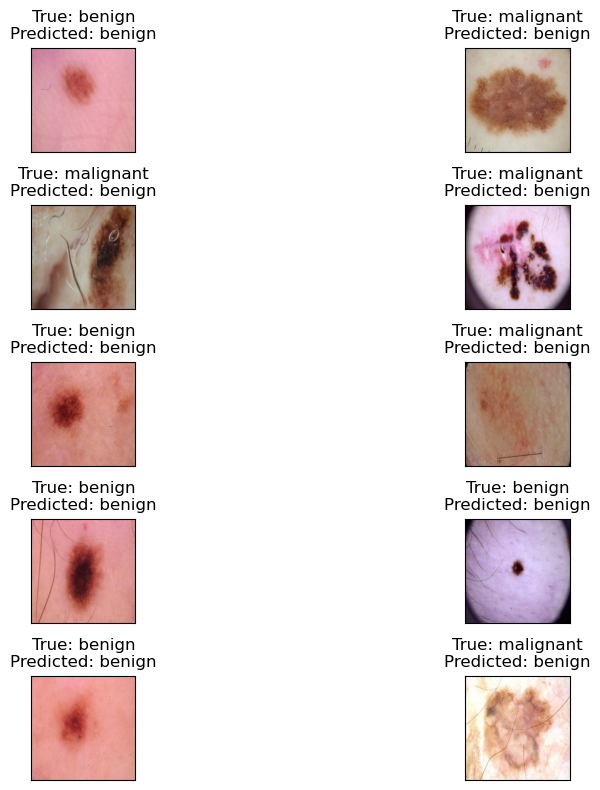

In [97]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 8),
                         subplot_kw={'xticks': [], 'yticks': []})  # Fixed here

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
    
plt.tight_layout()
plt.show()


In [98]:
!pip install opencv-python

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'train\\benign\\1000.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[0]]


In [100]:
from tensorflow.keras.models import load_model
loaded_model_resnet = load_model("skin_model.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0]]


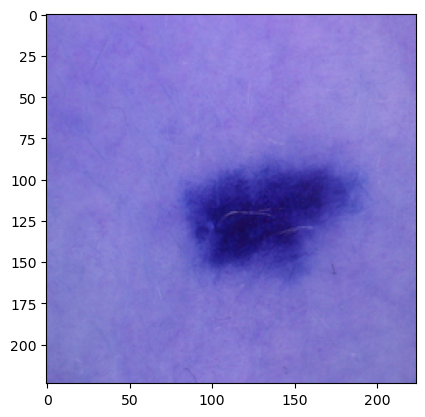

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'train\\benign\\1000.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (224,224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_resnet.predict(x)
print((result*100).astype('int'))
plt.imshow(img)

In [103]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[0]


In [104]:
print("largest element is :",max(pp))

largest element is : 0


In [110]:
index = pp.index(max(pp))

In [111]:
name_class=['benign', 'malignant']

In [112]:
name_class[index]

'benign'

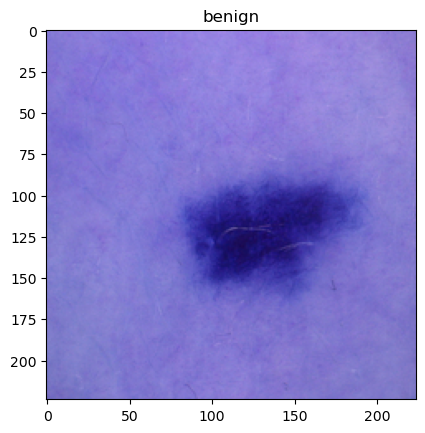

In [113]:
plt.title(name_class[index])
plt.imshow(img)